In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams['figure.figsize'] = (15, 5)

In [3]:
df = pd.read_csv('/home/msi/1c_forms/1c_forms_actions.csv', sep = ';', encoding = 'utf-8-sig')
# df.apply(lambda x: pd.lib.infer_dtype(x.values))

In [4]:
df.head(5)

,Дата,Пользователь,Документ,УИД,Действие,ТипОбъекта,ЭтоНовый,Ссылка
0,12.03.2019 8:09:58,Сафин Ринат Сергеевич,Документ.ЗаказКлиента.Форма.ФормаДокумента,4feb5a6c-4474-11e9-6a8c-00163e8dbbd3,Открытие,Заказ клиента,Нет,Заказ клиента ТР00-004984 от 04.03.2019 11:45:51
1,12.03.2019 8:10:04,Сафин Ринат Сергеевич,Документ.ЗаказКлиента.Форма.ФормаДокумента,4feb5a6c-4474-11e9-6a8c-00163e8dbbd3,Закрытие,Заказ клиента,Нет,Заказ клиента ТР00-004984 от 04.03.2019 11:45:51
2,12.03.2019 8:10:11,Жук Юлия Олеговна,Документ.ЗаказКлиента.Форма.ФормаДокумента,583a3e9a-4474-11e9-6a8c-00163e8dbbd3,Открытие,Заказ клиента,Нет,Заказ клиента ТР00-005060 от 04.03.2019 15:51:06
3,12.03.2019 8:10:11,Сафин Ринат Сергеевич,Документ.ЗаказКлиента.Форма.ФормаДокумента,58bb4076-4474-11e9-6a8c-00163e8dbbd3,Открытие,Заказ клиента,Нет,Заказ клиента ТР00-004896 от 04.03.2019 9:07:35
4,12.03.2019 8:10:15,Жук Юлия Олеговна,Документ.ЗаказКлиента.Форма.ФормаДокумента,583a3e9a-4474-11e9-6a8c-00163e8dbbd3,Закрытие,Заказ клиента,Нет,Заказ клиента ТР00-005060 от 04.03.2019 15:51:06


In [5]:
df.shape[0]

208792

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208792 entries, 0 to 208791
Data columns (total 8 columns):
Дата            208792 non-null object
Пользователь    208792 non-null object
Документ        208792 non-null object
УИД             208792 non-null object
Действие        208792 non-null object
ТипОбъекта      208792 non-null object
ЭтоНовый        208792 non-null object
Ссылка          197456 non-null object
dtypes: object(8)
memory usage: 12.7+ MB


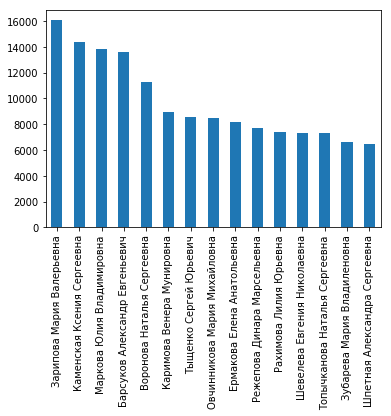

In [7]:
# ТОП 15 пользователей
total_users = df['Пользователь'].value_counts()
total_users[:15].plot(kind='bar')

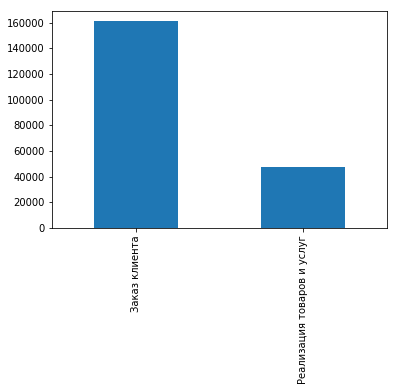

In [8]:
# Количество по виду документа
total_docs = df['ТипОбъекта'].value_counts()
total_docs[:15].plot(kind='bar')

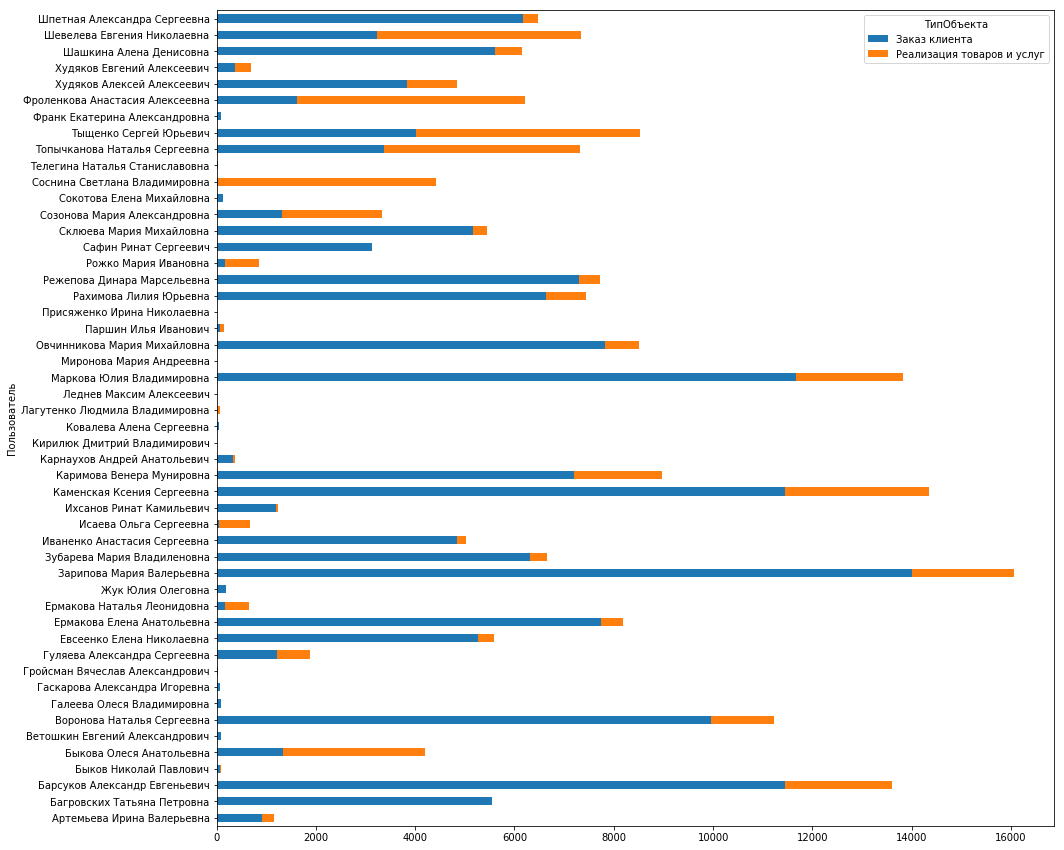

In [36]:
# Пользователи по типам документов
plt.rcParams['figure.figsize'] = (15,15)
# users = df.groupby(['Пользователь','ТипОбъекта']).agg({'ТипОбъекта': 'count'})
users = df.groupby(['Пользователь','ТипОбъекта'])
users = users.size().unstack()
users.fillna(0).plot(kind='barh', stacked=True)
# users.loc[: , 'ТипОбъекта']
# users.plot(kind='barh', stacked=True)

In [37]:
plt.rcParams['figure.figsize'] = (15, 5)
# Конвертируем дату время
df['Дата'] = pd.to_datetime(df['Дата'], format='%d.%m.%Y %H:%M:%S')
# Добавим колоку час
df['Час'] = df['Дата'].dt.hour

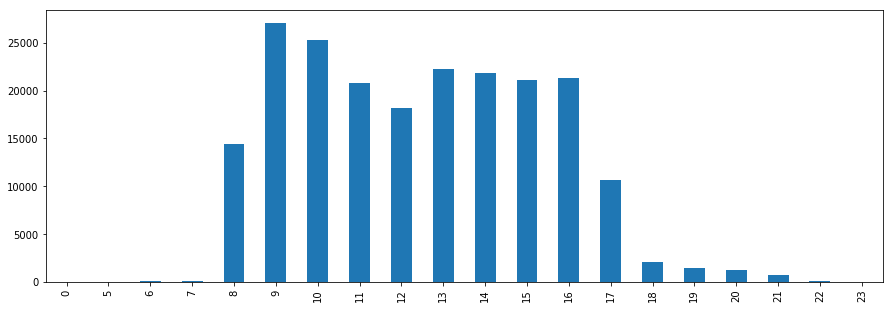

In [38]:
# Количество записей по часам
# total_hours.sort_values(ascending=False,inplace=True)
# total_hours.sort_index()
# sorted_df = total_hours.sort_values(['Час'])
# total_hours.reindex(np.intersect1d(total_hours, total_hours.index)).plot(kind='bar')

total_hours = df['Час'].value_counts()
total_hours.sort_index().plot(kind='bar')

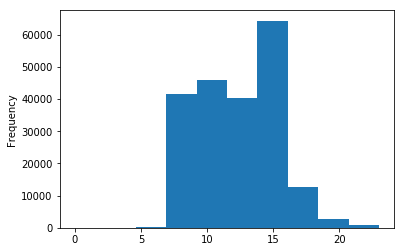

In [12]:
df['Час'].plot(kind='hist')

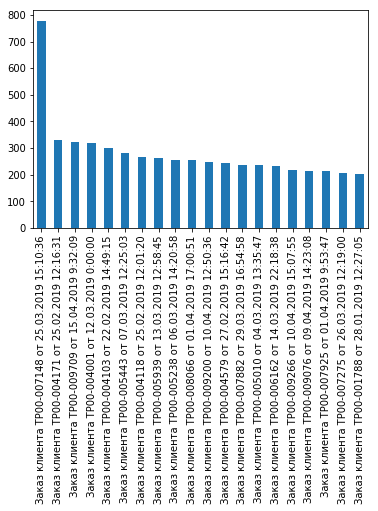

In [13]:
# 20 наиболее часто встречаемых документов
total_refs = df['Ссылка'].value_counts()
total_refs[:20].plot(kind='bar')

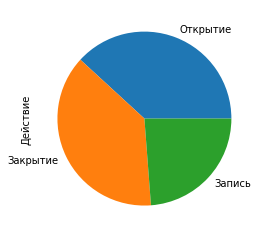

In [14]:
# Действия с формой
total_refs = df['Действие'].value_counts()
total_refs.plot(kind='pie')

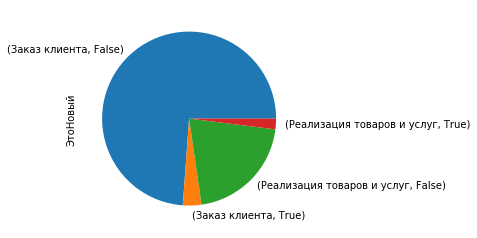

In [15]:
# Корректное заполнение поля 'ЭтоНовый'
df['ЭтоНовый'] = df['Ссылка'].isnull()

# Количество новых и существующих документов
docs = df.groupby(['ТипОбъекта', 'ЭтоНовый']).agg({'ЭтоНовый': 'count'})
docs.loc[: , 'ЭтоНовый'].plot(kind='pie')

In [ ]:
# время от создания формы до записи в бд

In [ ]:
# сколькл времени была открыта форма